#Random Forest classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
data = pd.read_csv('/content/heart_2020_cleaned.csv')
data.head(5)

MessageError: ignored

In [ ]:
data.columns
data.describe

<bound method NDFrame.describe of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex 

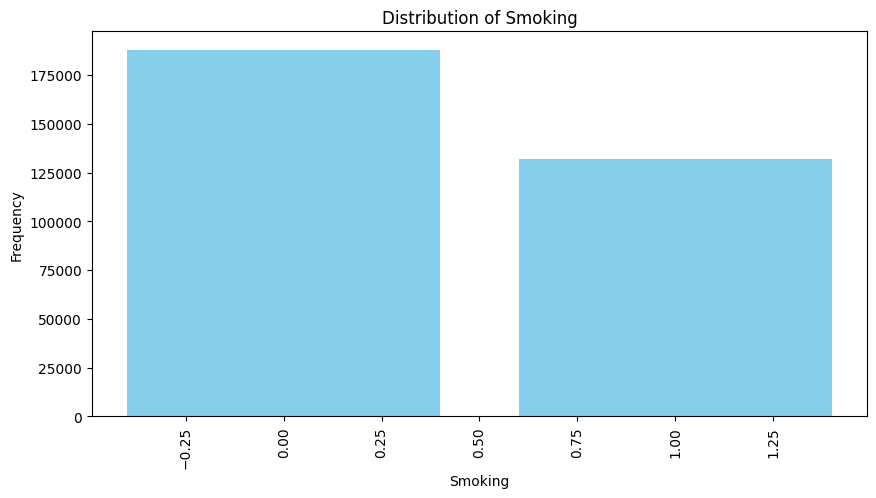

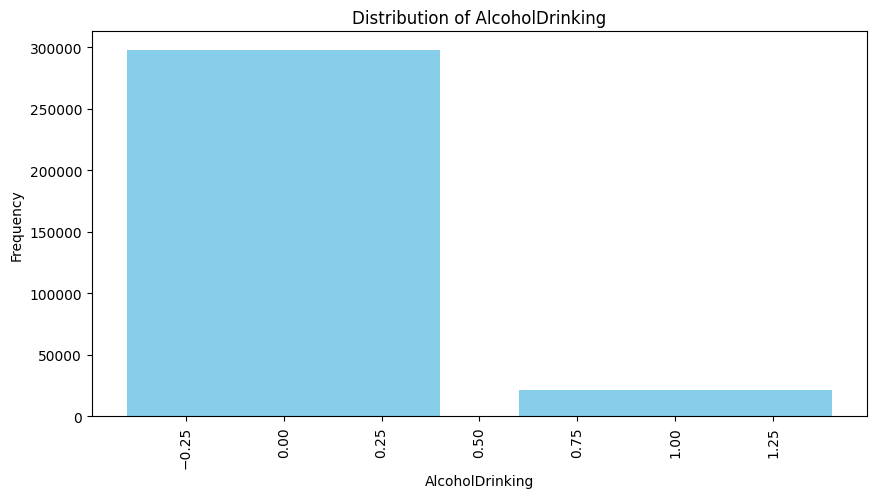

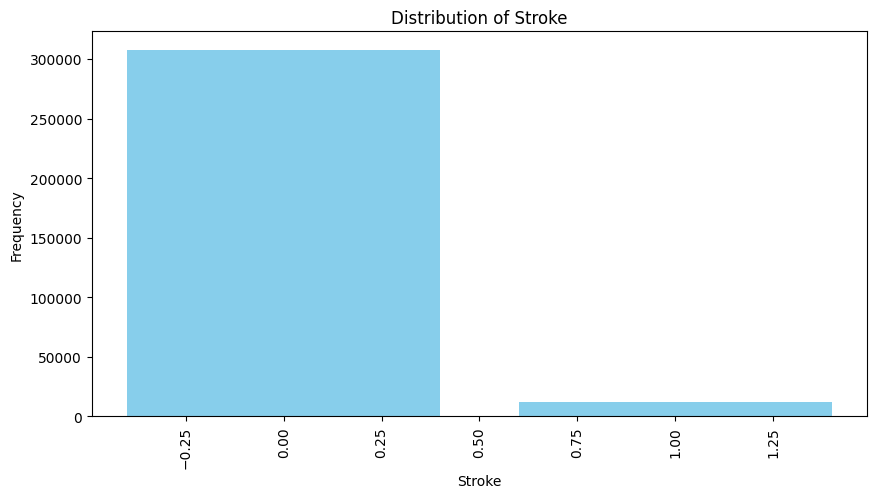

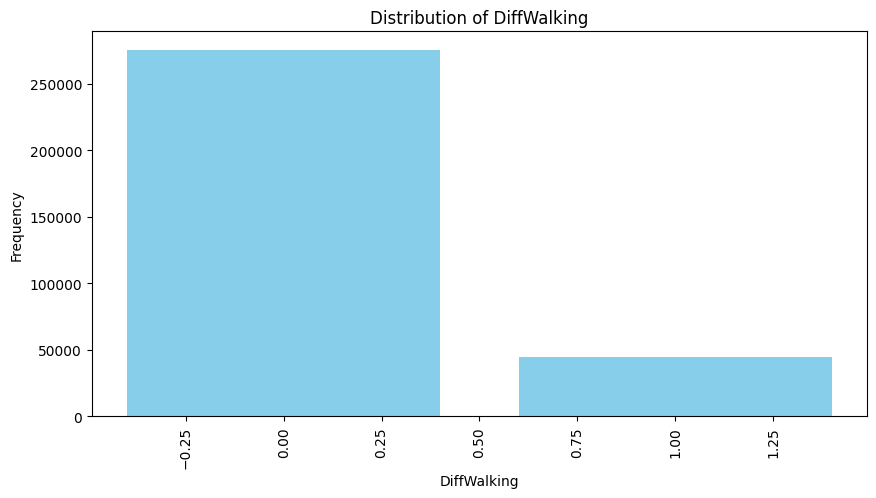

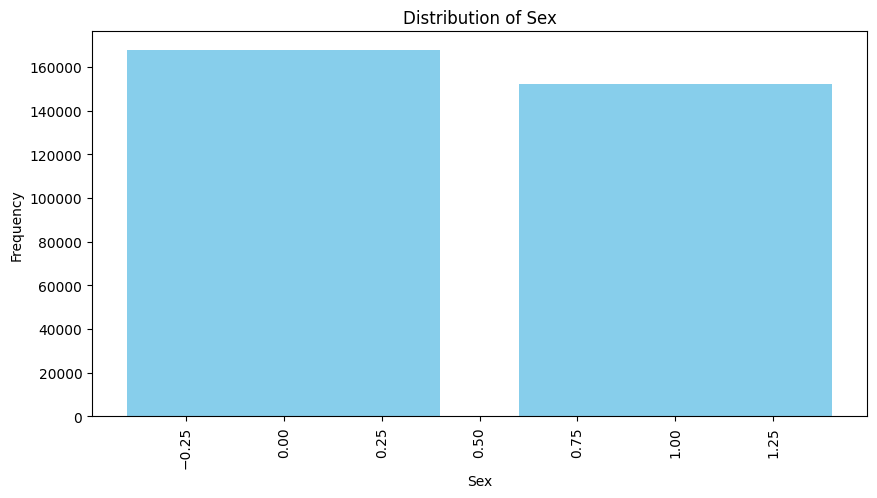

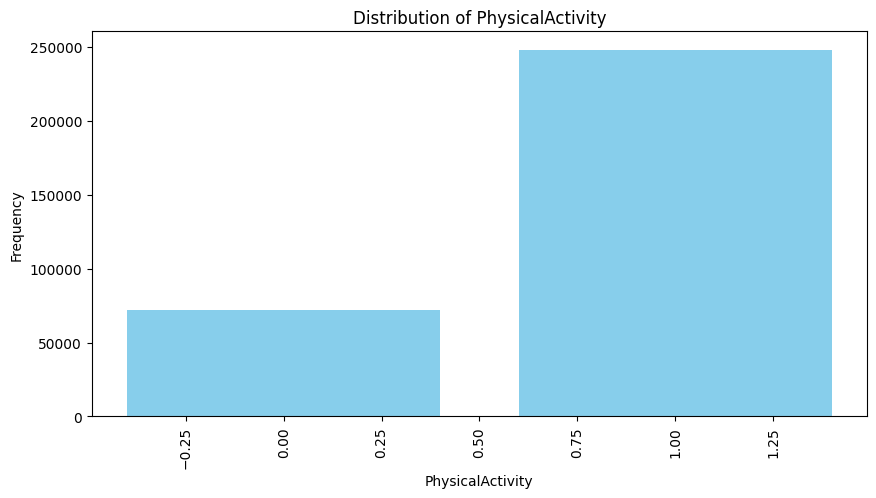

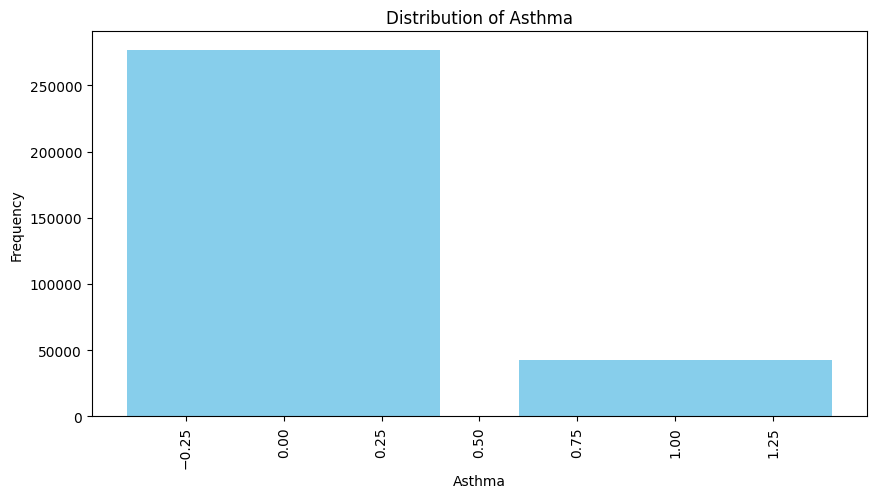

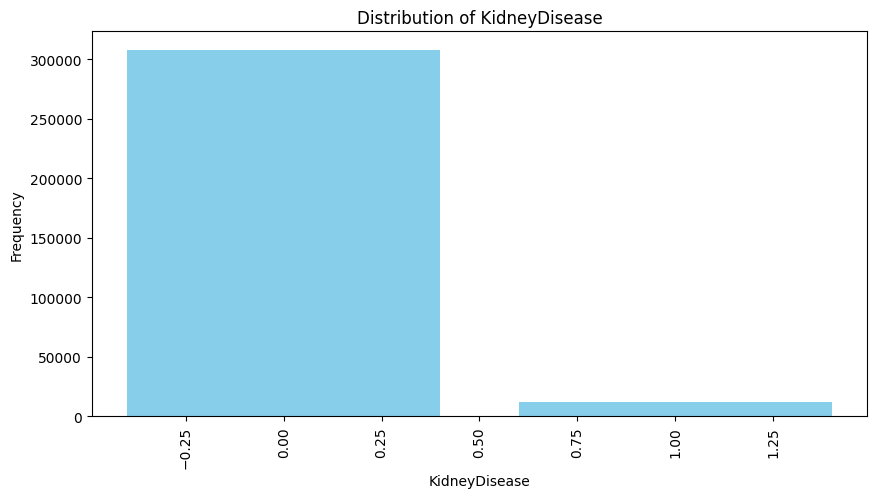

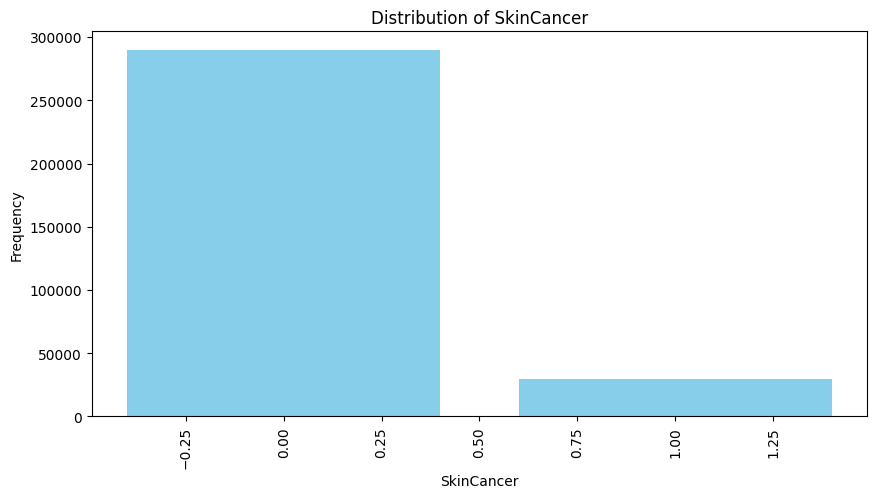

In [ ]:
import matplotlib.pyplot as plt
# List of categorical columns
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Plotting the distribution of each categorical variable
for col in categorical_cols:
    # Count the frequency of each category
    value_counts = data[col].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(value_counts.index, value_counts.values, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
    plt.show()

           Variable          Chi2        p-value
0           Smoking   3713.033147   0.000000e+00
2            Stroke  12386.488880   0.000000e+00
3       DiffWalking  12951.153005   0.000000e+00
4               Sex   1568.306917   0.000000e+00
5  PhysicalActivity   3199.008158   0.000000e+00
7     KidneyDisease   6739.226168   0.000000e+00
8        SkinCancer   2783.640540   0.000000e+00
6            Asthma    548.850841  2.238614e-121
1   AlcoholDrinking    328.649169   1.892352e-73


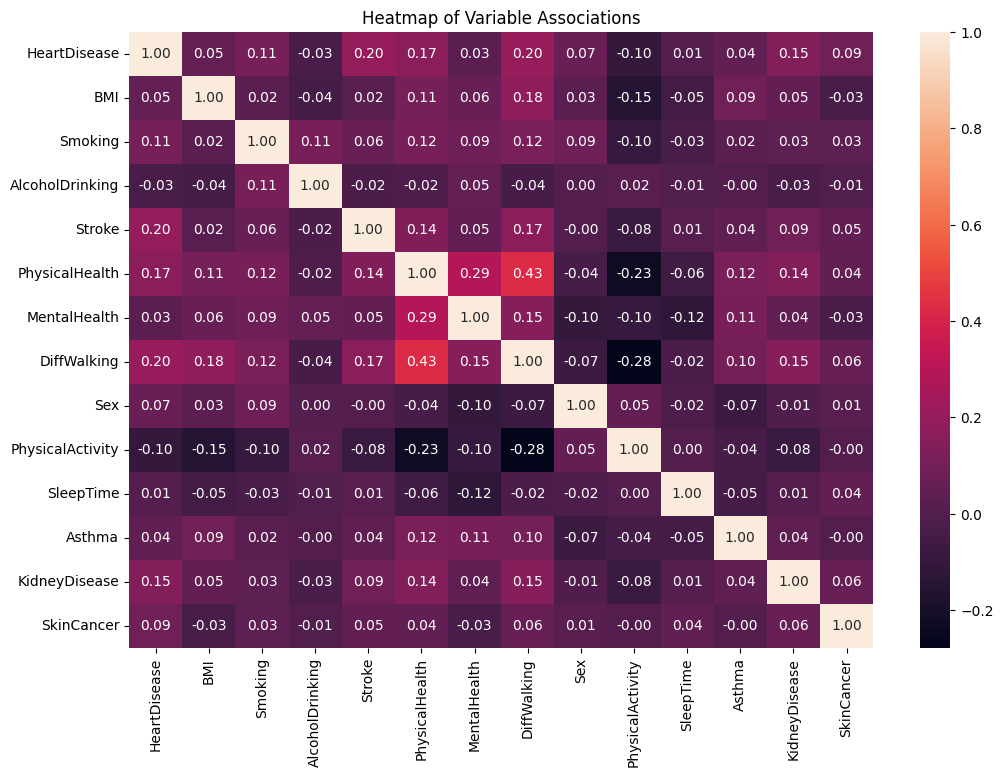

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Initialize a list to store chi-squared test results
chi_squared_results = []

# Perform Chi-squared test between each categorical variable and 'HeartDisease'
for col in categorical_cols:
    contingency_table = pd.crosstab(data['HeartDisease'], data[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_squared_results.append((col, chi2, p))

# Convert the results to a DataFrame and sort by the p-value
chi_squared_df = pd.DataFrame(chi_squared_results, columns=['Variable', 'Chi2', 'p-value'])
chi_squared_df = chi_squared_df.sort_values(by='p-value')

# Display the results
print(chi_squared_df)

# Visualize the associations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Heatmap of Variable Associations')
plt.show()

In [ ]:
heart_disease = data.copy()
label_encoder = LabelEncoder()
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity','Asthma', 'KidneyDisease','SkinCancer']

for columns in categorical_features:
    heart_disease[columns] = label_encoder.fit_transform(heart_disease[columns])

heart_disease.head()
heart_disease = heart_disease.drop(['AgeCategory', 'Race', 'Diabetic', 'GenHealth'], axis=1)

data = heart_disease.copy()

# New section

In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.8949436621186379
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     87649
           1       0.25      0.11      0.15      8290

    accuracy                           0.89     95939
   macro avg       0.59      0.54      0.55     95939
weighted avg       0.86      0.89      0.88     95939

